In [1]:
import numpy as np
import pandas as pd
from env import host, user, password


import matplotlib.pyplot as plt
import seaborn as sns

import prepare

import nltk
import nltk.sentiment
from wordcloud import WordCloud

## Exercises

### Spam Data

- Load the spam data set.

In [2]:
url = get_db_url("spam_db")
sql = "SELECT * FROM spam"

df = pd.read_sql(sql, url, index_col="id")
df.head()

NameError: name 'get_db_url' is not defined

Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?

In [ ]:
df = prepare.prep_text(df, 'text')
df

,label,text,clean,stemmed,lemmatized
id,,,,,
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,go jurong point crazi avail bugi n great world...,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joke wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,free entri 2 wkli comp win fa cup final tkt 21...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say,u dun say earli hor u c alreadi say,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around though,nah dont think goe usf live around though,nah dont think go usf life around though
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,2nd time tried 2 contact u u a750 pound prize ...,2nd time tri 2 contact u u a750 pound prize 2 ...,2nd time tried 2 contact u u a750 pound prize ...
5568,ham,Will Ì_ b going to esplanade fr home?,b going esplanade fr home,b go esplanad fr home,b going esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",pity mood soany suggestions,piti mood soani suggest,pity mood soany suggestion


In [ ]:
#split the dataframe into spam and ham text
spam = df[df.label == 'spam']
ham = df[df.label == 'ham']


In [ ]:
#Join them all into one string
spam_words = ' '.join(spam.lemmatized)
ham_words = ' '.join(ham.lemmatized)

In [ ]:
#Create bigrams for both the spam and ham messages
spam_bigrams = pd.Series(nltk.ngrams(spam_words.split(), 2))
ham_bigrams = pd.Series(nltk.ngrams(ham_words.split(), 2))

In [ ]:
top_20_spam_bigrams = spam_bigrams.value_counts().head(20).sort_values(ascending = False)

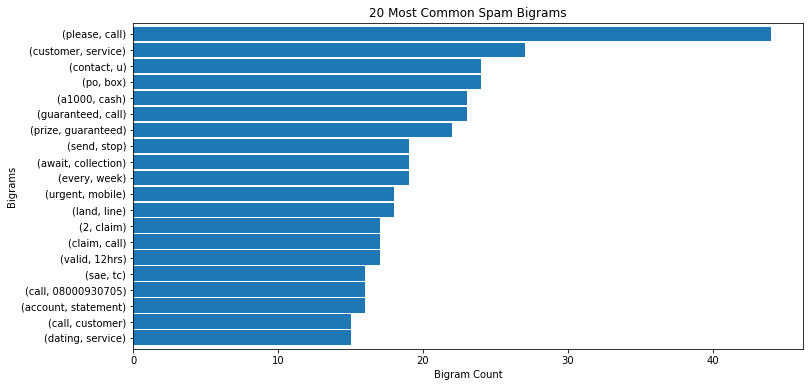

In [ ]:
# Visualize the top 20 spam bigrams
top_20_spam_bigrams.sort_values().plot.barh(width = .9, figsize = (12,6))
plt.xlabel('Bigram Count')
plt.ylabel('Bigrams')
plt.title('20 Most Common Spam Bigrams')
plt.show()

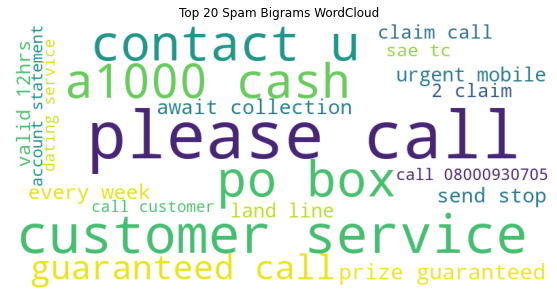

In [ ]:
#Generate a wordcloud

#First create a dictionary for the fequencies of the bigrams
data = {k[0] + ' ' + k[1]: count for k, count in top_20_spam_bigrams.to_dict().items()}

#Create the wordcloud
#Change the figsize before creating the wordcloud
plt.figure(figsize=(10, 5))
image = WordCloud(background_color = 'white', width = 800, height = 400).generate_from_frequencies(data)
plt.title('Top 20 Spam Bigrams WordCloud')
plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
top_20_ham_bigrams = ham_bigrams.value_counts().head(20).sort_values(ascending = False)
top_20_ham_bigrams

(call, later)      52
(ill, call)        48
(let, know)        41
(sorry, ill)       39
(r, u)             37
(u, r)             34
(dont, know)       32
(good, morning)    31
(wan, 2)           31
(new, year)        30
(take, care)       26
(im, going)        24
(u, get)           23
(u, wan)           23
(ok, lor)          22
(pls, send)        22
(im, gonna)        20
(happy, new)       19
(good, night)      19
(ltgt, min)        19
dtype: int64

In [ ]:
# Create dataframe to explore ham bigrams
top_20_ham_bigrams = ham_bigrams.value_counts().head(20).sort_values(ascending = False)
top_20_ham_bigrams

(call, later)      52
(ill, call)        48
(let, know)        41
(sorry, ill)       39
(r, u)             37
(u, r)             34
(dont, know)       32
(good, morning)    31
(wan, 2)           31
(new, year)        30
(take, care)       26
(im, going)        24
(u, get)           23
(u, wan)           23
(ok, lor)          22
(pls, send)        22
(im, gonna)        20
(happy, new)       19
(good, night)      19
(ltgt, min)        19
dtype: int64

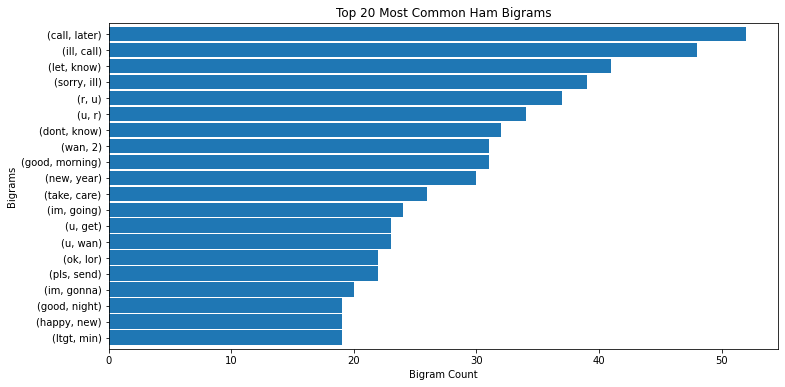

In [ ]:
#Visualization the ham bigrams
top_20_ham_bigrams.sort_values().plot.barh(width = 0.9, figsize = (12,6))
plt.title('Top 20 Most Common Ham Bigrams')
plt.xlabel('Bigram Count')
plt.ylabel('Bigrams')
plt.show()

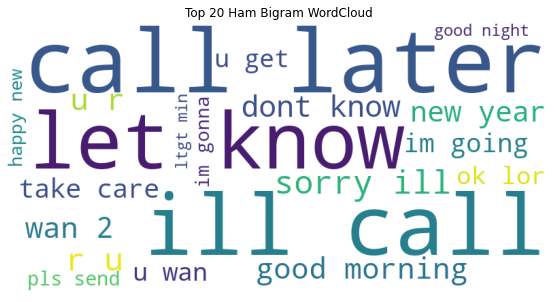

In [ ]:
#Create a word cloud of the ham bigrams
#Create dictionary for the frequencies
data = {k[0] + ' ' + k[1]: count for k, count in top_20_ham_bigrams.to_dict().items()}

#change the figsize before creating the wordcloud
plt.figure(figsize=(10,5))
image = WordCloud(background_color = 'white', width= 800, height = 400).generate_from_frequencies(data)
plt.title('Top 20 Ham Bigram WordCloud')
plt.imshow(image)
plt.axis('off')
plt.show()

Is there any overlap in the bigrams for the spam data and the ham data?

#### No but the word call appears frequently in both

Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

In [ ]:
spam_trigrams = pd.Series(nltk.ngrams(spam_words.split(), 3))
ham_trigrams = pd.Series(nltk.ngrams(ham_words.split(), 3))

In [ ]:
#Find the top 20 spam and ham trigrams
top_20_spam_trigrams = spam_trigrams.value_counts().head(20)
top_20_ham_trigrams = ham_trigrams.value_counts().head(20)

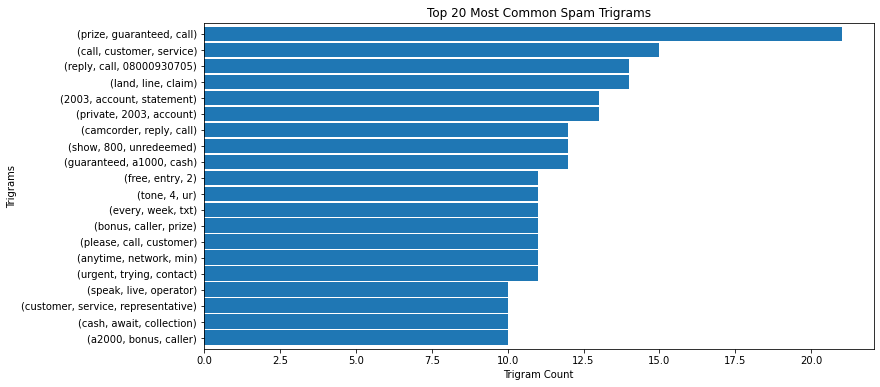

In [ ]:
#Visualize the top 20 spam trigrams
top_20_spam_trigrams.sort_values().plot.barh(width = 0.9, figsize=(12,6))
plt.title('Top 20 Most Common Spam Trigrams')
plt.xlabel('Trigram Count')
plt.ylabel('Trigrams')
plt.show()

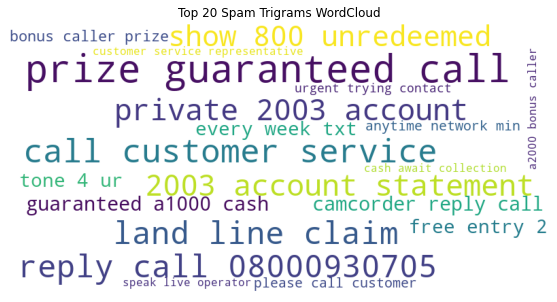

In [ ]:
#Create a wordcloud for the spam trigrams
#Create the dictionary for the frequencies
data = {k[0] + ' ' + k[1] + ' ' + k[2]: count for k, count in top_20_spam_trigrams.to_dict().items()}


plt.figure(figsize=(10,5))
image = WordCloud(background_color = 'white', width = 800, height = 400).generate_from_frequencies(data)
plt.title('Top 20 Spam Trigrams WordCloud')
plt.imshow(image)
plt.axis('off')
plt.show()

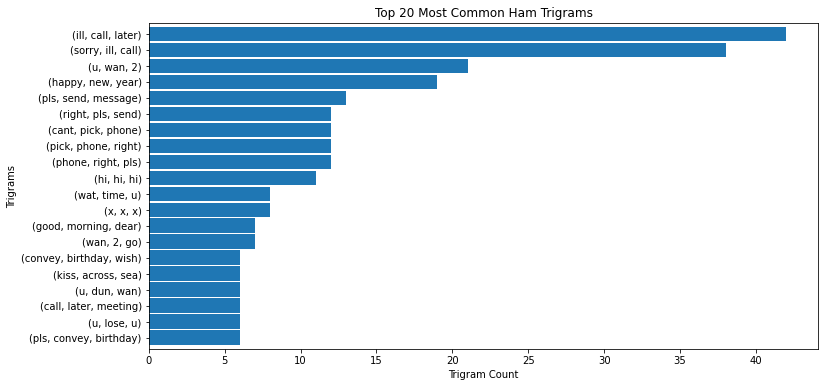

In [ ]:
#Create visualizations for the ham trigrams
top_20_ham_trigrams.sort_values().plot.barh(width=0.9, figsize=(12,6))
plt.title('Top 20 Most Common Ham Trigrams')
plt.xlabel('Trigram Count')
plt.ylabel('Trigrams')
plt.show()

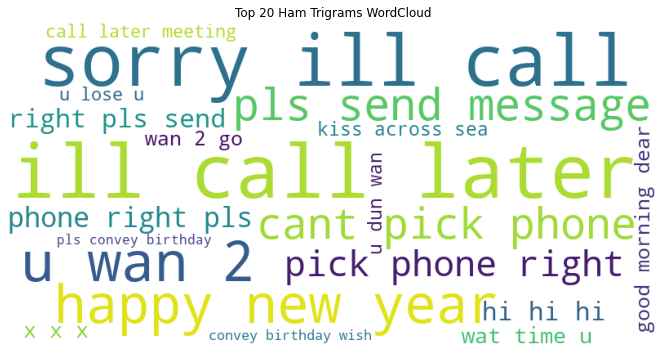

In [ ]:
#Create the ham trigram wordcloud

#First create the dictionary for the frequencies
data = {k[0] + ' ' + k[1] + ' ' + k[2]: count for k, count in top_20_ham_trigrams.to_dict().items()}

#Create the image
plt.figure(figsize=(12,6))
image = WordCloud(background_color = 'white', width = 800, height = 400).generate_from_frequencies(data)
plt.title('Top 20 Ham Trigrams WordCloud')
plt.imshow(image)
plt.axis('off')
plt.show()
